https://www.kaggle.com/dyasin/week24ml-weather-dataset-rattle-package-weatheraus/edit/run/68212956

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.metrics import accuracy_score,mean_squared_error,roc_curve,roc_auc_score,classification_report,r2_score,confusion_matrix

from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

# For data visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set()
# Plotly for interactive graphics 
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

import missingno as msno
# Disabling warnings
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# After performing all data processing and cleaning steps, and after splitting train /test.

# Logistic regression
# Naive Bayes
# K-Nearest Neighbor (KNN)
# Support Vector Mechanism (SVM) Get predictions using Machine Learning models and compare these scores.
# Which of these models is the best?

# DATA READING AND EXPLORING

In [2]:
data = pd.read_csv("../input/weather-dataset-rattle-package/weatherAUS.csv")
df = data.copy().sample(10000)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
16824,2013-12-12,Newcastle,18.4,27.5,0.0,NaN,NaN,NaN,NaN,NaN,...,78.0,58.0,NaN,NaN,6.0,2.0,22.5,26.0,No,No
22056,2011-08-26,NorfolkIsland,16.0,19.4,26.4,0.8,7.6,SSW,61.0,SSW,...,84.0,80.0,1021.5,1020.7,4.0,5.0,17.6,18.7,Yes,No
93076,2016-12-04,GoldCoast,19.7,28.0,1.6,NaN,NaN,NW,37.0,NNE,...,80.0,77.0,1015.6,1013.1,NaN,NaN,26.6,26.8,Yes,No
11933,2017-02-12,CoffsHarbour,25.1,35.1,0.0,NaN,NaN,S,91.0,NE,...,47.0,69.0,1002.2,996.9,6.0,8.0,31.8,28.7,No,No
144970,2016-02-22,Uluru,22.6,39.8,9.0,NaN,NaN,ENE,28.0,E,...,60.0,17.0,1015.2,1011.2,4.0,NaN,27.8,38.3,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67631,2009-09-05,Melbourne,6.5,17.2,2.6,3.6,9.1,WNW,46.0,N,...,65.0,31.0,1016.1,1014.6,1.0,6.0,11.2,16.7,Yes,No
63730,2016-03-22,Sale,10.8,21.5,1.0,NaN,NaN,E,35.0,NE,...,98.0,55.0,1021.7,1018.4,3.0,NaN,14.9,21.2,No,No
66296,2015-01-04,MelbourneAirport,15.0,23.3,3.2,16.8,7.8,N,70.0,S,...,80.0,48.0,1018.0,1017.6,8.0,1.0,15.9,22.5,Yes,No
32220,2013-12-04,Sydney,17.8,27.8,0.0,8.8,7.9,NNE,54.0,ENE,...,61.0,63.0,1006.3,1000.5,5.0,7.0,23.5,24.9,No,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 16824 to 39628
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           10000 non-null  object 
 1   Location       10000 non-null  object 
 2   MinTemp        9891 non-null   float64
 3   MaxTemp        9917 non-null   float64
 4   Rainfall       9752 non-null   float64
 5   Evaporation    5717 non-null   float64
 6   Sunshine       5255 non-null   float64
 7   WindGustDir    9267 non-null   object 
 8   WindGustSpeed  9272 non-null   float64
 9   WindDir9am     9249 non-null   object 
 10  WindDir3pm     9672 non-null   object 
 11  WindSpeed9am   9862 non-null   float64
 12  WindSpeed3pm   9763 non-null   float64
 13  Humidity9am    9800 non-null   float64
 14  Humidity3pm    9678 non-null   float64
 15  Pressure9am    8942 non-null   float64
 16  Pressure3pm    8942 non-null   float64
 17  Cloud9am       6219 non-null   float64
 18  Cl

In [4]:
pd.DataFrame({"No. of unique values": list(df.nunique())}, index=df.columns)

,No. of unique values
Date,3038
Location,49
MinTemp,345
MaxTemp,412
Rainfall,267
Evaporation,168
Sunshine,142
WindGustDir,16
WindGustSpeed,58
WindDir9am,16


In [5]:
for i in df.select_dtypes(include='object'):   
    print(i,'-->',df[i].unique())

Date --> ['2013-12-12' '2011-08-26' '2016-12-04' ... '2009-12-16' '2014-05-07'
 '2014-04-07']
Location --> ['Newcastle' 'NorfolkIsland' 'GoldCoast' 'CoffsHarbour' 'Uluru' 'Darwin'
 'SydneyAirport' 'Walpole' 'MelbourneAirport' 'PearceRAAF' 'SalmonGums'
 'Moree' 'Launceston' 'Watsonia' 'Sydney' 'PerthAirport' 'Brisbane'
 'Wollongong' 'Albany' 'Canberra' 'Albury' 'Sale' 'Hobart' 'Dartmoor'
 'Witchcliffe' 'Penrith' 'Bendigo' 'Mildura' 'Nuriootpa' 'Perth' 'Cairns'
 'Portland' 'Townsville' 'NorahHead' 'Tuggeranong' 'AliceSprings' 'Nhil'
 'MountGambier' 'Richmond' 'Woomera' 'Cobar' 'Ballarat' 'BadgerysCreek'
 'Melbourne' 'Adelaide' 'MountGinini' 'Katherine' 'Williamtown'
 'WaggaWagga']
WindGustDir --> [nan 'SSW' 'NW' 'S' 'ENE' 'ESE' 'WNW' 'SE' 'N' 'NE' 'SSE' 'NNE' 'E' 'W'
 'WSW' 'SW' 'NNW']
WindDir9am --> [nan 'SSW' 'NNE' 'NE' 'E' 'S' 'NW' 'SSE' 'N' 'NNW' 'SE' 'SW' 'ESE' 'W'
 'WSW' 'ENE' 'WNW']
WindDir3pm --> ['SE' 'SSE' 'NNE' 'ENE' 'SSW' 'WNW' 'S' 'W' 'NW' 'NE' nan 'N' 'NNW' 'ESE'
 'E' 'SW' 

In [6]:
y = len(df[df['RainTomorrow'] == 'Yes'])
n = len(df[df['RainTomorrow'] == 'No'])
print(y,n)

2212 7565


In [7]:
df.duplicated().sum()

0

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,9891.0,12.190486,6.467518,-6.3,7.5,12.0,17.0,31.4
MaxTemp,9917.0,23.243148,7.153157,-3.1,17.8,22.6,28.3,46.7
Rainfall,9752.0,2.411895,8.139912,0.0,0.0,0.0,0.8,157.6
Evaporation,5717.0,5.468777,4.287439,0.0,2.6,4.8,7.4,68.8
Sunshine,5255.0,7.630599,3.761084,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,9272.0,40.051553,13.700990,7.0,31.0,39.0,48.0,130.0
WindSpeed9am,9862.0,13.976780,8.902494,0.0,7.0,13.0,19.0,74.0
WindSpeed3pm,9763.0,18.762266,8.854160,0.0,13.0,19.0,24.0,67.0
Humidity9am,9800.0,68.994388,19.140648,2.0,57.0,70.0,83.0,100.0
Humidity3pm,9678.0,51.412069,20.571756,1.0,37.0,52.0,65.0,100.0


In [9]:
print(df.shape)
print(df.ndim)
print(df.size)

(10000, 23)
2
230000


In [10]:
# Here we can see the variables in the model and set the variables for the model. 
# We can also remove some variables.
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.742661,0.116241,0.475141,0.083073,0.182147,0.185115,0.176393,-0.245492,-0.003288,-0.457515,-0.463783,0.089639,0.029878,0.903014,0.717306
MaxTemp,0.742661,1.000000,-0.074096,0.598206,0.473501,0.072607,0.024584,0.049516,-0.512529,-0.507713,-0.341359,-0.431298,-0.274393,-0.267758,0.888266,0.984265
Rainfall,0.116241,-0.074096,1.000000,-0.083798,-0.230388,0.116719,0.080402,0.058203,0.234429,0.261986,-0.165638,-0.121095,0.209041,0.184654,0.019337,-0.076091
Evaporation,0.475141,0.598206,-0.083798,1.000000,0.381311,0.226807,0.198892,0.110126,-0.537521,-0.413391,-0.271366,-0.288971,-0.189281,-0.202126,0.549877,0.583052
Sunshine,0.083073,0.473501,-0.230388,0.381311,1.000000,-0.048142,-0.002420,0.017490,-0.494283,-0.630542,0.045259,-0.022015,-0.683360,-0.707678,0.290794,0.495377
WindGustSpeed,0.182147,0.072607,0.116719,0.226807,-0.048142,1.000000,0.598192,0.687792,-0.221661,-0.032370,-0.465009,-0.424349,0.070893,0.114186,0.159633,0.035517
WindSpeed9am,0.185115,0.024584,0.080402,0.198892,-0.002420,0.598192,1.000000,0.523153,-0.274957,-0.035094,-0.231288,-0.178535,0.034004,0.061332,0.140547,0.012135
WindSpeed3pm,0.176393,0.049516,0.058203,0.110126,0.017490,0.687792,0.523153,1.000000,-0.146451,0.017493,-0.303652,-0.264971,0.053503,0.034702,0.169784,0.025387
Humidity9am,-0.245492,-0.512529,0.234429,-0.537521,-0.494283,-0.221661,-0.274957,-0.146451,1.000000,0.668372,0.152208,0.199597,0.446366,0.340319,-0.480301,-0.507736
Humidity3pm,-0.003288,-0.507713,0.261986,-0.413391,-0.630542,-0.032370,-0.035094,0.017493,0.668372,1.000000,-0.015843,0.064956,0.511736,0.516247,-0.223246,-0.555452


# SOME VISUALIZATION

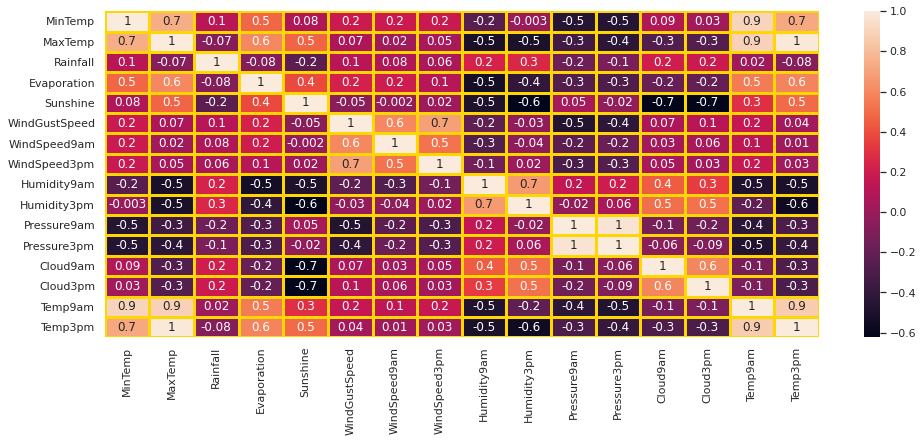

In [11]:
plt.figure(figsize = (16,6)) 
sns.heatmap(df.corr(),robust=True,fmt='.1g',linewidths=1.3,linecolor = 'gold', annot=True,);

<AxesSubplot:>

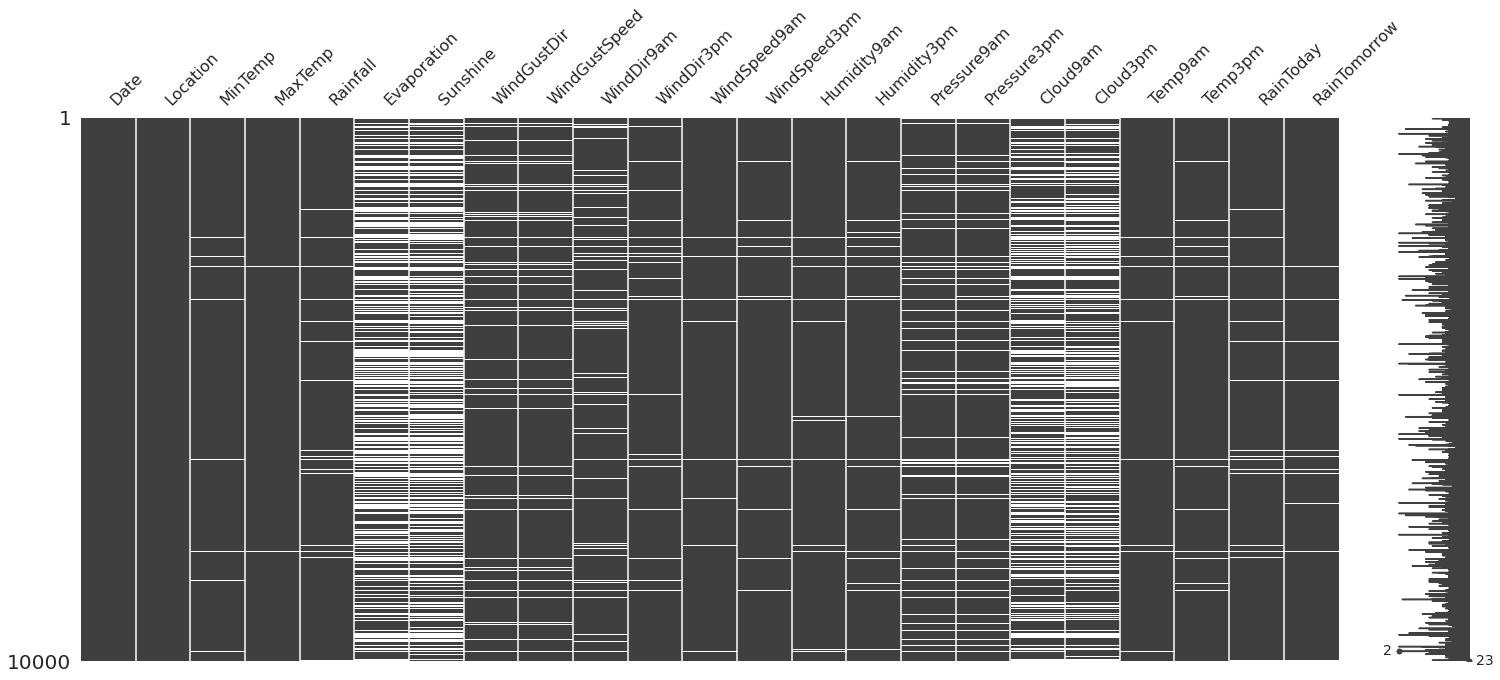

In [12]:
#VISUALIZATION OF NAN  VALUES
msno.matrix(df)

In [13]:
#drop missing values in the RainToday and RainTomorrow
df.dropna(subset=['RainToday', 'RainTomorrow'],axis=0,inplace=True)

<AxesSubplot:xlabel='RainToday', ylabel='count'>

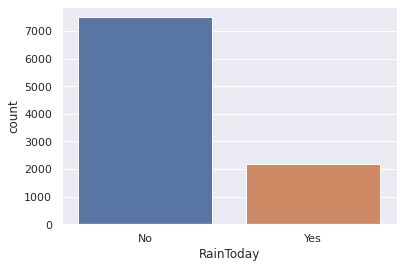

In [14]:
sns.countplot(x="RainToday",data=df)

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

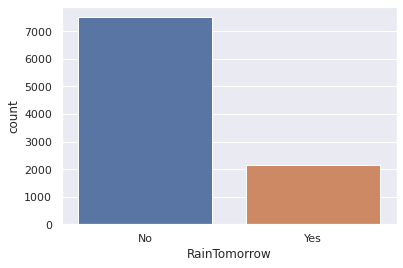

In [15]:
sns.countplot(x="RainTomorrow",data=df)

# Multivariate imputation
* In multivariate imputation, we use ML Algorithms and before that we need to encode the categorical variables.(Çok değişkenli atamada, ML Algoritmaları kullanıyoruz ve bundan önce kategorik değişkenleri kodlamamız gerekiyor.)

In [16]:
def summary(df):
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0]) # .shape[0] yazilmaz ise unique olan degerlerin listelerini getirir.
    Nulls = df.apply(lambda x: x.isnull().sum())

    cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
    str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    display(str.sort_values(by='Nulls', ascending=False))
    print('__________Data Types__________\n')
    print(str.Types.value_counts())
summary(df)

,Types,Counts,Uniques,Nulls,Min,Max
Sunshine,float64,5159,143,4514,0.0,14.5
Evaporation,float64,5628,169,4045,0.0,68.8
Cloud3pm,float64,5871,10,3802,0.0,8.0
Cloud9am,float64,6120,11,3553,0.0,9.0
Pressure3pm,float64,8710,426,963,977.1,1036.9
Pressure9am,float64,8713,435,960,983.9,1039.2
WindDir9am,object,8994,17,679,NaN,NaN
WindGustDir,object,9017,17,656,NaN,NaN
WindGustSpeed,float64,9021,59,652,7.0,130.0
WindDir3pm,object,9391,17,282,NaN,NaN


__________Data Types__________

float64    16
object      7
Name: Types, dtype: int64


In [17]:
# Label encoding for univariate variables.
from sklearn.preprocessing import LabelEncoder

lbe = LabelEncoder()
df["RainToday_label"] = lbe.fit_transform(df["RainToday"])
df["RainTomorrow_label"] = lbe.fit_transform(df["RainTomorrow"])

In [18]:
# one-hot encoding for variables with more than 2 categories

#drop variables with so many countries for the sake of time and memory consumption
df.drop(['Location','WindDir9am','WindDir3pm'], axis=1, inplace=True) 

df = pd.get_dummies(df, drop_first=True, columns = ['WindGustDir'], prefix = ['WindGustDir'])

In [19]:
def summary(df):
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0]) # .shape[0] yazilmaz ise unique olan degerlerin listelerini getirir.
    Nulls = df.apply(lambda x: x.isnull().sum())

    cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
    str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    display(str.sort_values(by='Nulls', ascending=False))
    print('__________Data Types__________\n')
    print(str.Types.value_counts())
summary(df)

,Types,Counts,Uniques,Nulls,Min,Max
Sunshine,float64,5159,143,4514,0.0,14.5
Evaporation,float64,5628,169,4045,0.0,68.8
Cloud3pm,float64,5871,10,3802,0.0,8.0
Cloud9am,float64,6120,11,3553,0.0,9.0
Pressure3pm,float64,8710,426,963,977.1,1036.9
Pressure9am,float64,8713,435,960,983.9,1039.2
WindGustSpeed,float64,9021,59,652,7.0,130.0
Humidity3pm,float64,9424,101,249,1.0,100.0
WindSpeed3pm,float64,9479,37,194,0.0,67.0
Temp3pm,float64,9491,401,182,-3.9,46.1


__________Data Types__________

float64    16
uint8      15
object      3
int64       2
Name: Types, dtype: int64


In [20]:
# DecisionTreeRegressor

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor

#drop unnecessary columns and date columns
df_imputation = df.drop(['Date','RainToday','RainTomorrow'], axis=1) 

#define variables to keep the index and the columns
index = df_imputation.index
columns = df_imputation.columns

#imputation steps
imp_tree = IterativeImputer(random_state=0, estimator=DecisionTreeRegressor())
imp_tree.fit(df_imputation)
df_imputed = imp_tree.transform(df_imputation)

#transform imputed data in array format to dataframe
df_imputed_tree = pd.DataFrame(df_imputed, index=index, columns=columns)

df_imputed_tree.isnull().sum()

MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation           0
Sunshine              0
WindGustSpeed         0
WindSpeed9am          0
WindSpeed3pm          0
Humidity9am           0
Humidity3pm           0
Pressure9am           0
Pressure3pm           0
Cloud9am              0
Cloud3pm              0
Temp9am               0
Temp3pm               0
RainToday_label       0
RainTomorrow_label    0
WindGustDir_ENE       0
WindGustDir_ESE       0
WindGustDir_N         0
WindGustDir_NE        0
WindGustDir_NNE       0
WindGustDir_NNW       0
WindGustDir_NW        0
WindGustDir_S         0
WindGustDir_SE        0
WindGustDir_SSE       0
WindGustDir_SSW       0
WindGustDir_SW        0
WindGustDir_W         0
WindGustDir_WNW       0
WindGustDir_WSW       0
dtype: int64

In [21]:
df_imputed_tree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9673 entries, 16824 to 39628
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MinTemp             9673 non-null   float64
 1   MaxTemp             9673 non-null   float64
 2   Rainfall            9673 non-null   float64
 3   Evaporation         9673 non-null   float64
 4   Sunshine            9673 non-null   float64
 5   WindGustSpeed       9673 non-null   float64
 6   WindSpeed9am        9673 non-null   float64
 7   WindSpeed3pm        9673 non-null   float64
 8   Humidity9am         9673 non-null   float64
 9   Humidity3pm         9673 non-null   float64
 10  Pressure9am         9673 non-null   float64
 11  Pressure3pm         9673 non-null   float64
 12  Cloud9am            9673 non-null   float64
 13  Cloud3pm            9673 non-null   float64
 14  Temp9am             9673 non-null   float64
 15  Temp3pm             9673 non-null   float64
 16  R

In [22]:
df_imputed_tree.isnull().sum()

MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation           0
Sunshine              0
WindGustSpeed         0
WindSpeed9am          0
WindSpeed3pm          0
Humidity9am           0
Humidity3pm           0
Pressure9am           0
Pressure3pm           0
Cloud9am              0
Cloud3pm              0
Temp9am               0
Temp3pm               0
RainToday_label       0
RainTomorrow_label    0
WindGustDir_ENE       0
WindGustDir_ESE       0
WindGustDir_N         0
WindGustDir_NE        0
WindGustDir_NNE       0
WindGustDir_NNW       0
WindGustDir_NW        0
WindGustDir_S         0
WindGustDir_SE        0
WindGustDir_SSE       0
WindGustDir_SSW       0
WindGustDir_SW        0
WindGustDir_W         0
WindGustDir_WNW       0
WindGustDir_WSW       0
dtype: int64

# PREDICTION WITH CLASSIFICATION METHODS
# Preparation dependent and independent variables

In [23]:
df2 = df_imputed_tree.copy()
x_dat = df2.drop(['RainTomorrow_label'],axis=1)
y = df2["RainTomorrow_label"].values

In [24]:
summary(df2)

,Types,Counts,Uniques,Nulls,Min,Max
Cloud3pm,float64,9673,9,0,0.0,8.0
WindGustDir_N,float64,9673,2,0,0.0,1.0
WindSpeed3pm,float64,9673,36,0,0.0,67.0
WindGustSpeed,float64,9673,58,0,7.0,130.0
WindGustDir_WSW,float64,9673,2,0,0.0,1.0
WindGustDir_WNW,float64,9673,2,0,0.0,1.0
WindGustDir_W,float64,9673,2,0,0.0,1.0
WindGustDir_SW,float64,9673,2,0,0.0,1.0
WindGustDir_SSW,float64,9673,2,0,0.0,1.0
WindGustDir_SSE,float64,9673,2,0,0.0,1.0


__________Data Types__________

float64    33
Name: Types, dtype: int64


# Normalization

In [25]:
#If there is a outlier values, it must be done before coming here.
x = (x_dat-np.min(x_dat))/(np.max(x_dat)-np.min(x_dat)).values

# LETS TRY CLASSIFICATIONS METHODS
* Now we've got our data split into training and test sets, it's time to build a machine learning model.

* We'll train it (find the patterns) on the training set.

* And we'll test it (use the patterns) on the test set.

* We're going to try machine learning models:

1) Logistic Regression

2) Naive Bayes

3) K-Nearest Neighbor (KNN)

4) Support Vector Mechanism (SVM)

# 1) LOGISTIC REGRESSION

# A) Train-test splitting

In [26]:
y = df.RainTomorrow_label.values
x_dat = df.drop(["RainTomorrow_label"],axis=1)

In [27]:
from sklearn.model_selection import train_test_split,cross_val_score,ShuffleSplit,GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

# B) Modeling of Logistic Regression Method

In [28]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression() # Default olanlar gelir.C var..
lr_model.fit(x_train,y_train)

LogisticRegression()

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'liblinear')
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [30]:
lr #We can see what there is in lr(icinde hangi secenekler vargormek icin).

LogisticRegression(solver='liblinear')

In [31]:
lr.intercept_  # Constant coefficient(Sabit katsayi).

array([-3.26630224])

In [32]:
lr.coef_   # Variable coefficients(Degisken katsayilari). # Bu katsayilar denklemin katsayilari. 
           # Ornegin (-) olanlar ters yonde etkiliyor.

array([[-0.49307706,  0.40761319,  0.55099125, -0.55415653, -2.08366403,
         5.0385559 , -1.16503672, -0.53171493,  0.20312412,  4.43058689,
         1.23419322, -4.27841237, -0.07811328,  0.65254879,  1.39777904,
         0.09398937,  0.55412495,  0.01322998, -0.30443193,  0.19087591,
        -0.27078845, -0.0436709 ,  0.24119896,  0.36078041,  0.10452291,
         0.01626835,  0.08253478, -0.22304119, -0.23405747,  0.0531786 ,
         0.07041068, -0.34518672]])

# C) Lets control the succes(score) prediction(accuracy_score,confusion m.) on test_data

In [33]:
l_score = accuracy_score(y_test,y_pred)
l_score
# The y predicted by the y in the test are compared(test deki y ile tahmin edilen yler karsilastiriliyor.
# Dogru tahmin etme yuzdesi bulunuyor)

0.8445638693675073

In [34]:
c_l = confusion_matrix(y_test,y_pred)# We found the numbers of guessing with confusion matrix.
                                    # (Confusion matrixle tahmin etme sayilarini bulduk.)
c_l                                

array([[1763,  107],
       [ 269,  280]])

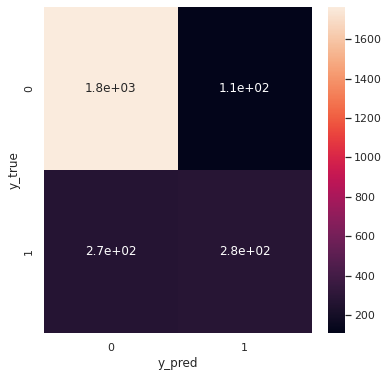

In [35]:
from sklearn.metrics import confusion_matrix   #Hepsi icin yapilabilir.
y_true = y_test
y_pred = lr.predict(x_test)
cmlr = confusion_matrix(y_true, y_pred)
f,ax = plt.subplots(figsize=(6,6))
sns.heatmap(cmlr, annot=True)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# CLASSICICATION REPORT

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1870
           1       0.72      0.51      0.60       549

    accuracy                           0.84      2419
   macro avg       0.80      0.73      0.75      2419
weighted avg       0.83      0.84      0.83      2419



# D) LOOK AT ALL PREDICTION VALUE ON TEST DATA

In [37]:
lr.predict(x_test)[0:10] # Our predictions in the top 10 data test(Ilk 10 datatest deki tahminlerimiz).

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [38]:
lr.predict_proba(x_test)[0:10] # 1.si 0 olma 2.si 1 olma olasiligi oranlari.

array([[0.44741763, 0.55258237],
       [0.96937056, 0.03062944],
       [0.97986284, 0.02013716],
       [0.96854003, 0.03145997],
       [0.77380536, 0.22619464],
       [0.93725191, 0.06274809],
       [0.99197604, 0.00802396],
       [0.93572371, 0.06427629],
       [0.98750011, 0.01249989],
       [0.9660318 , 0.0339682 ]])

# E) TUNING THE PREDICTION
* We can tune our prediction.

In [39]:
y_probs = lr.predict_proba(x_test)[:,1]

In [40]:
y_pred = [1 if i>0.60 else 0 for i in y_probs]
y_pred[-10:]

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [41]:
confusion_matrix(y_test,y_pred)

array([[1802,   68],
       [ 317,  232]])

In [42]:
# accuracy_score(y_test,y_pred)
# log_score = accuracy_score(y_test,y_pred)
log_score = accuracy_score(y_test,y_pred)
print ("log score=",log_score)

log score= 0.8408433236874742


In [43]:
# Cross validation (10 katli ) yaparsak
lr_finalscore = cross_val_score(lr_model, x_test, y_test, cv = 10).mean()
lr_finalscore

0.8388069682109667

# 2) NAIVE BAYES METHOD
* In machine learning, Naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features.
* Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem.

# A) Train-test splitting

In [44]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)
nb_model

GaussianNB()

# B) Modeling of Naive Bayes Method

In [45]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
y_pred[:10]

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [46]:
?nb

Type:        GaussianNB
String form: GaussianNB()
File:        /opt/conda/lib/python3.7/site-packages/sklearn/naive_bayes.py
Docstring:  
Gaussian Naive Bayes (GaussianNB)

Can perform online updates to model parameters via :meth:`partial_fit`.
For details on algorithm used to update feature means and variance online,
see Stanford CS tech report STAN-CS-79-773 by Chan, Golub, and LeVeque:

    http://i.stanford.edu/pub/cstr/reports/cs/tr/79/773/CS-TR-79-773.pdf

Read more in the :ref:`User Guide <gaussian_naive_bayes>`.

Parameters
----------
priors : array-like of shape (n_classes,)
    Prior probabilities of the classes. If specified the priors are not
    adjusted according to the data.

var_smoothing : float, default=1e-9
    Portion of the largest variance of all features that is added to
    variances for calculation stability.

    .. versionadded:: 0.20

Attributes
----------
class_count_ : ndarray of shape (n_classes,)
    number of training samples observed in each class.

cl

# C) Lets control the succes(score) prediction(accuracy_score,confusion m.) on test_data

In [47]:
n_score = accuracy_score(y_test,y_pred)
n_score

0.7664324100868127

In [48]:
c_nb = confusion_matrix(y_test,y_pred)
c_nb
# We found the numbers to guess with confusion matrix(confusion matrixle tahmin etme sayilarini bulduk).

array([[1481,  389],
       [ 176,  373]])

# HEATMAP IN CONFUSION MATRIX
* We can see the confusion matrix in Heatmap.

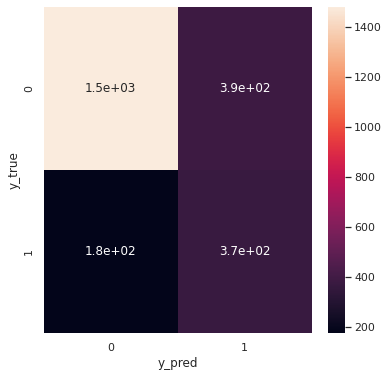

In [49]:
from sklearn.metrics import confusion_matrix   #Hepsi icin yapilabilir
y_true = y_test
y_pred = nb.predict(x_test)
cmnb = confusion_matrix(y_true, y_pred)
f,ax = plt.subplots(figsize=(6,6))
sns.heatmap(cmnb, annot=True)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# LOOK AT ALL PREDICTION VALUE ON TEST DATA

In [50]:
nb.predict(x_test)[0:10] # Our predictions in the top 10 data test(Ilk 10 datatest deki tahminlerimiz).

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [51]:
nb.predict_proba(x_test)[0:10] #1.si 0 olma 2.si 1 olma olasiligi oranlari

array([[7.68459431e-02, 9.23154057e-01],
       [9.99979168e-01, 2.08320825e-05],
       [9.99921428e-01, 7.85718880e-05],
       [9.99571363e-01, 4.28637330e-04],
       [2.77250064e-01, 7.22749936e-01],
       [9.32107321e-01, 6.78926789e-02],
       [9.99999998e-01, 2.13877626e-09],
       [9.99459597e-01, 5.40403372e-04],
       [9.99999390e-01, 6.09910196e-07],
       [9.99842506e-01, 1.57493950e-04]])

# E) TUNING THE PREDICTION
* WE can tune our prediction

In [52]:
y_probs = nb.predict_proba(x_test)[:,1]
y_pred = [1 if i>0.60 else 0 for i in y_probs]
y_pred[0:10]

[1, 0, 0, 0, 1, 0, 0, 0, 0, 0]

In [53]:
nb_tuned_bestscore = accuracy_score(y_test,y_pred)
nb_tuned_bestscore

0.7718065316246383

In [54]:
cmnb_best = confusion_matrix(y_test,y_pred) 
cmnb_best

array([[1512,  358],
       [ 194,  355]])

In [55]:
# Cross validation (10 katli ) yaparsak
nb_finalscore=cross_val_score(nb_model, x_test, y_test, cv = 10).mean()
nb_finalscore

0.7739000720139912

# 3) KNN METHOD
* In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression.
* A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small).
* In this method we need to choose k value.It means that we chose k number of points of classes which are nearest to the out test point. We can call this small data set. We count the number of classes in the small dataset and determine the highest number of class. Finally we can say our test point belongs to the class.

* While choosing k number we have to be carefull because small k value causes overfitting while big k value causes underfitting.

* Coding is the same for all supervised classes and we jus need to change the last part of the code.

* K=1 SECERSEK OVERFITTING OLABILIR, K= BUYUK SECERSEK UNDERFITTING OLABILIR

In [56]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model = knn_model.fit(x_train, y_train)
?knn_model

Type:        KNeighborsClassifier
String form: KNeighborsClassifier()
File:        /opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py
Docstring:  
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'} or callable, default='uniform'
    weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape
      containing the weights.

algorithm : {'auto', 

# A) Prediction of KNN

In [57]:
y_pred = knn_model.predict(x_test)

# B) Accuracy score of KNN

In [58]:
KNN = accuracy_score(y_test, y_pred)
KNN

0.8131459280694502

In [59]:
confusion_matrix(y_test,y_pred)

array([[1729,  141],
       [ 311,  238]])

# C) Model Tuning of KNN

In [60]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [61]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [62]:
print("The best score:" + str(knn_cv.best_score_))
print("The best parameters: " + str(knn_cv.best_params_))

The best score:0.8170690605110668
The best parameters: {'n_neighbors': 8}


In [63]:
knn = KNeighborsClassifier(4)  # We choose 4 neigboors. Because we get better result than 1, 2 and 3. 
knn_tuned = knn.fit(x_train, y_train)

In [64]:
knn_finalscore = knn_tuned.score(x_test, y_test)
knn_finalscore

0.8102521703183133

# 4) SVM(SUPPORT VECTOR MACHINES)
* Support Vector Machines are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier.
* SVM is used fo both regression and classification problems, but generally for classification. There is a C parameter inside the SVM algoritma and the default value of C parameter is 1. If C is small, it causes the misclassification. If C is big, it causes ovetfitting. So we need to try C parameter to find best value.
* SVM, hem regresyon hem de sınıflandırma problemleri için kullanılır, ancak genellikle sınıflandırma için kullanılır. SVM içerisinde C parametresi vardır ve C parametresinin default değeri 1'dir. C'nin küçük olması yanlış sınıflandırmaya neden olur. C büyükse overfitting e neden olur. Bu yüzden en iyi değeri bulmak için C parametresini denememiz gerekiyor.

In [65]:
from sklearn.svm import SVC

svm_model = SVC().fit(x_train,y_train)#we choose default c:1,kernel:'rbf',dagree:3...
?svm_model

Type:        SVC
String form: SVC()
File:        /opt/conda/lib/python3.7/site-packages/sklearn/svm/_classes.py
Docstring:  
C-Support Vector Classification.

The implementation is based on libsvm. The fit time scales at least
quadratically with the number of samples and may be impractical
beyond tens of thousands of samples. For large datasets
consider using :class:`sklearn.svm.LinearSVC` or
:class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
:class:`sklearn.kernel_approximation.Nystroem` transformer.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided
kernel functions and how `gamma`, `coef0` and `degree` affect each
other, see the corresponding section in the narrative documentation:
:ref:`svm_kernels`.

Read more in the :ref:`User Guide <svm_classification>`.

Parameters
----------
C : float, default=1.0
    Regularization parameter. The strength of the regularization is
    inve

# A) Prediction of SVC

In [66]:
y_pred = svm_model.predict(x_test)

# B) Accuracy score of SVM

In [67]:
SVC = accuracy_score(y_test,y_pred)
SVC

0.8453906572964035